In [219]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
from matplotlib import pyplot as plt
import json
from numpyencoder import NumpyEncoder
from tqdm import tqdm
from sklearn import metrics
warnings.simplefilter("ignore", UserWarning)
pd.options.mode.chained_assignment = None

In [94]:
ROOT = os.path.join(os.getcwd(), 'Statsbomb_data\open-data-master')
DATA = os.path.join(ROOT, 'data')
FINAL_DF = os.path.join(ROOT,'final_dataframes')

# Preparing Data

In [208]:
df = pd.read_pickle(
    filepath_or_buffer=os.path.join(FINAL_DF,'engineered_features.pkl')
)

In [209]:
df.shape

(25793, 31)

In [132]:
df.reset_index(inplace=True, drop=True)
df.drop('index',inplace=True,axis=1)

In [211]:
main_baseline_df = pd.read_pickle(
    filepath_or_buffer=os.path.join(FINAL_DF,'final_df.pkl')
)

In [187]:
baseline_df = main_baseline_df.sort_values(by=['statsbomb_xg']).tail(10000)

In [188]:
other_baseline_df = main_baseline_df.sort_values(by=['statsbomb_xg']).head(main_baseline_df.shape[0]-10000)

In [189]:
other_baseline_df

,player,first_touch,open_goal,under_pressure,shot_technique,shot_body_part,statsbomb_xg,goal,aerial_shot,from_play,one_v_one,event_id
16418,Ronaldo de Assis Moreira,False,False,False,Normal,Right Foot,0.000180,False,True,Corner,True,c28405cb-0742-43d0-80b9-7ff486710e0c
7632,Joaquín Sánchez Rodríguez,False,False,False,Normal,Right Foot,0.000180,False,True,Corner,True,547c60b4-eee4-4430-a7ab-ad088531590a
2612,José Edmílson Gomes de Moraes,False,False,False,Normal,Right Foot,0.002535,False,True,Throw In,False,f1aa7e24-f832-46e5-b4db-171c30a257aa
11265,Raúl García Escudero,False,False,False,Normal,Right Foot,0.002608,False,True,Regular Play,False,69344467-51a1-4c8a-8dfe-296a2fa2fb58
7283,Beñat Etxebarria Urkiaga,False,False,False,Lob,Right Foot,0.002722,False,True,Regular Play,False,a352515d-422e-48a5-b5d5-a1cb6978d02a
...,...,...,...,...,...,...,...,...,...,...,...,...
10980,Petros Matheus dos Santos Araújo,True,False,False,Normal,Right Foot,0.064130,False,True,Throw In,False,8755483c-cb12-4f12-9d46-1644b35cb357
1674,Gabriel Fernández Arenas,True,False,False,Half Volley,Right Foot,0.064138,False,True,Regular Play,False,4fda5816-31e4-4d8e-90cd-b353c6a7693e
16876,Anderson Luís de Souza,False,False,False,Normal,Right Foot,0.064153,False,True,Free Kick,False,13295604-8080-4ef7-a166-f62083226ae8
10913,Charles Días Barbosa de Oliveira,False,False,False,Normal,Right Foot,0.064154,False,True,Corner,False,68903565-5790-4309-b570-6127ac389416


In [190]:
baseline_df

,player,first_touch,open_goal,under_pressure,shot_technique,shot_body_part,statsbomb_xg,goal,aerial_shot,from_play,one_v_one,event_id
16159,Henrik Larsson,False,False,True,Normal,Head,0.064161,False,True,Corner,False,7c24f511-d76b-460e-9bd5-94a38f9bd128
1268,Francisco Alcácer García,False,False,False,Normal,Head,0.064173,False,True,Free Kick,False,7d7e0dc9-e01b-44d2-a185-8f15b362ead1
10196,Rubén Castro Martín,False,False,True,Normal,Head,0.064179,False,True,Regular Play,False,734b3e2a-03d6-4175-81fc-d48e35e9c393
20463,Lionel Andrés Messi Cuccittini,False,False,False,Normal,Left Foot,0.064184,False,True,Free Kick,False,db9bf530-743a-4619-83c5-a7444e6599eb
153,Joan Jordán Moreno,False,False,False,Normal,Right Foot,0.064192,False,True,Regular Play,False,73fe75e4-79b7-48b9-b302-5cfab5cc8b97
...,...,...,...,...,...,...,...,...,...,...,...,...
7936,Adrián López Álvarez,True,True,False,Normal,Left Foot,0.972047,True,True,Throw In,False,8dbfa2a1-30ce-4f74-a45d-7a5c606de98d
20375,Luis Jesús Rioja González,False,True,False,Normal,Left Foot,0.976192,True,False,Regular Play,True,75bdc651-c041-4021-b201-cb9eb8b97837
11133,Sofiane Feghouli,False,True,False,Normal,Right Foot,0.980070,True,True,Counter,True,d8eb08c4-624d-4f7e-8378-1a3d97be3e1b
3907,Lionel Andrés Messi Cuccittini,False,True,False,Half Volley,Left Foot,0.984711,True,True,Regular Play,True,d3b73047-3292-48ea-93d1-f854e221a4d6


In [191]:
final_df = baseline_df.join(
    other=df[['player_name','body_part_strong','wpa','dfg','angle','gk_distance','specific_position']],
    how='left'
)
other_final_df = other_baseline_df.join(
    other=df[['player_name','body_part_strong','wpa','dfg','angle','gk_distance','specific_position']],
    how='left'
)

In [192]:
final_df.drop(['player','player_name','event_id'],axis=1,inplace=True)
other_final_df.drop(['player','player_name','event_id'],axis=1,inplace=True)

In [193]:
final_df.head(5)

,first_touch,open_goal,under_pressure,shot_technique,shot_body_part,statsbomb_xg,goal,aerial_shot,from_play,one_v_one,body_part_strong,wpa,dfg,angle,gk_distance,specific_position
16159,False,False,True,Normal,Head,0.064161,False,True,Corner,False,NaN,False,0.153869,0.142320,0.035391,Midfield
1268,False,False,False,Normal,Head,0.064173,False,True,Free Kick,False,Right Foot,False,0.137108,0.210996,0.016094,Attack
10196,False,False,True,Normal,Head,0.064179,False,True,Regular Play,False,Right Foot,False,0.235676,0.104622,0.097355,Attack
20463,False,False,False,Normal,Left Foot,0.064184,False,True,Free Kick,False,NaN,False,0.281548,0.052109,0.047514,Defense
153,False,False,False,Normal,Right Foot,0.064192,False,True,Regular Play,False,Left Foot,False,0.242280,0.112794,0.035031,Midfield


In [194]:
encoded_final_df = pd.get_dummies(
    data=final_df,
    columns=['first_touch','open_goal','under_pressure','shot_technique','shot_body_part','goal','aerial_shot','from_play','one_v_one','wpa'],
    drop_first=True
)
encoded_other_final_df = pd.get_dummies(
    data=other_final_df,
    columns=['first_touch','open_goal','under_pressure','shot_technique','shot_body_part','goal','aerial_shot','from_play','one_v_one','wpa'],
    drop_first=True
)

In [195]:
category_mappings = {}
category_other_mappings = {}
for c in ['body_part_strong','specific_position']:
    encoded_final_df[c]=encoded_final_df[c].astype('category')  
    d = dict(enumerate(encoded_final_df[c].cat.categories))
    category_mappings[c]=d  
    encoded_final_df[c]=encoded_final_df[c].cat.codes
    
    encoded_other_final_df[c]=encoded_other_final_df[c].astype('category')  
    d = dict(enumerate(encoded_other_final_df[c].cat.categories))
    category_other_mappings[c]=d  
    encoded_other_final_df[c]=encoded_other_final_df[c].cat.codes

In [196]:
#hyperparameter tuning
# import pandas for data wrangling
import pandas as pd


# import numpy for Scientific computations
import numpy as np


# import machine learning libraries
import xgboost as xgb
from sklearn.metrics import accuracy_score


# import packages for hyperparameters tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

X = encoded_final_df.drop('goal_True',axis=1).reset_index(drop=True)
y = encoded_final_df['goal_True'].reset_index(drop=True)

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size = 0.3)



space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }

def objective(space):
    clf=xgb.XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( X_train.drop('statsbomb_xg',axis=1), y_train), ( X_test.drop('statsbomb_xg',axis=1), y_test)]
    
    clf.fit(X_train.drop('statsbomb_xg',axis=1), y_train,
            eval_set=evaluation, eval_metric="logloss",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(X_test.drop('statsbomb_xg',axis=1))
    accuracy = accuracy_score(y_test, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [197]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

  0%|          | 0/100 [00:00<?, ?trial/s, best loss=?]

SCORE:                                                 
0.7726666666666666                                     
SCORE:                                                                            
0.7726666666666666                                                                
SCORE:                                                                            
0.7726666666666666                                                                
SCORE:                                                                            
0.7726666666666666                                                                
SCORE:                                                                            
0.7726666666666666                                                                
SCORE:                                                                            
0.7726666666666666                                                                
SCORE:                                                    

In [198]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

The best hyperparameters are :  

{'colsample_bytree': 0.7877041143665975, 'gamma': 7.44395542851132, 'max_depth': 8.0, 'min_child_weight': 5.0, 'reg_alpha': 88.0, 'reg_lambda': 0.8228139319664365}


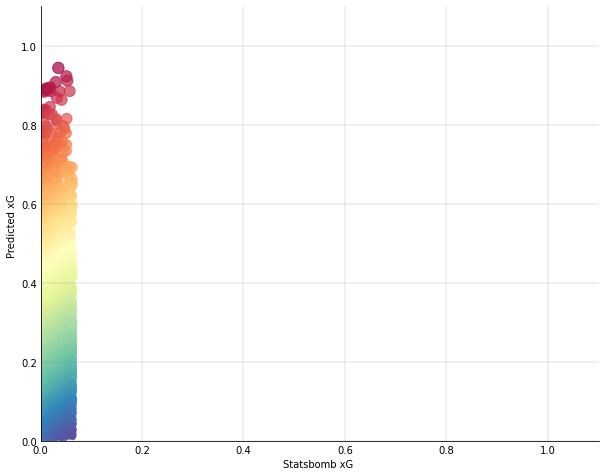

In [204]:
X = encoded_final_df.drop('goal_True',axis=1).reset_index(drop=True)
y = encoded_final_df['goal_True'].reset_index(drop=True)

model = xgb.XGBClassifier(tree_method="hist")
X_train, X_test, y_train, target_test=train_test_split(X, y, test_size = 0.2)
model.fit(X_train.drop('statsbomb_xg',axis=1), y_train)


other_xG = model.predict_proba(encoded_other_final_df.drop(['statsbomb_xg','goal_True'],axis=1))[:,1]

error = np.subtract(
    encoded_other_final_df['statsbomb_xg'],
    other_xG
)

plt.figure(figsize=(10,8))
plt.xlim(0,1.1)
plt.ylim(0,1.1)
plt.grid(
    color='gray',
    alpha=0.15,
    linewidth=1.5
)
g=plt.scatter(
    encoded_other_final_df['statsbomb_xg'],
    other_xG,
    s=(plt.rcParams['lines.markersize'] * (1+np.absolute(error))) ** 2,
    c=error,
    alpha=0.7,
    cmap='Spectral'
)
g.axes.set_xlabel('Statsbomb xG ')
g.axes.set_ylabel('Predicted xG ')
g.axes.spines[['right', 'top']].set_visible(False)
g.axes.tick_params(axis=u'both', which=u'both',length=0) # Credit: https://stackoverflow.com/questions/29988241/hide-ticks-but-show-tick-labels

In [202]:
other_xG

array([0.24744514, 0.24744514, 0.21476422, ..., 0.21476422, 0.21476422,
       0.21476422], dtype=float32)

In [220]:
metrics.mean_squared_error(y_true=encoded_other_final_df.drop(['goal_True'],axis=1)['statsbomb_xg'], y_pred=other_xG)

0.0416258873770879

In [221]:
category_other_mappings

{'body_part_strong': {0: 'Head', 1: 'Left Foot', 2: 'Other', 3: 'Right Foot'},
 'specific_position': {0: 'Attack',
  1: 'Defense',
  2: 'Goalkeeper',
  3: 'Midfield'}}